In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import kurtosis


In [3]:
os.listdir()

['bot_parameters.json',
 'README.md',
 'analytics.py',
 'base.py',
 'bots.py',
 '__pycache__',
 'playing.py',
 '.vscode',
 'test_bot.py',
 '.git',
 'your_algo.py',
 'game.py',
 'game_record.csv']

In [7]:
df = pd.read_csv("player_mid_prices.csv", index_col=0)
df.head()

,UEC
0,1000.0
1,1001.7
2,1001.2
3,1001.2
4,1001.1


In [8]:
df["log_ret"] = np.log(df["UEC"] / df["UEC"].shift(1))

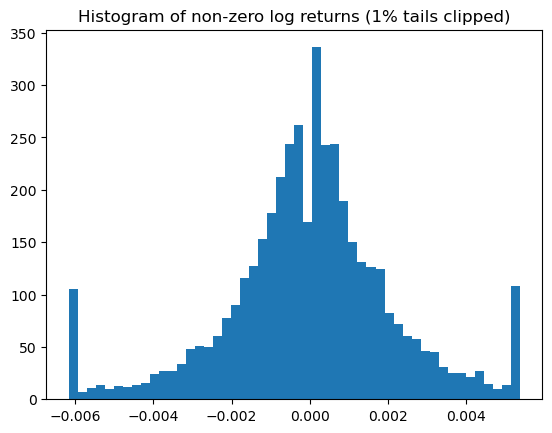

In [14]:
# Only plot the non-zero log returns, clipped at 1% and 99%
lower = df["log_ret"].quantile(0.01)
upper = df["log_ret"].quantile(0.99)
clipped = df["log_ret"].clip(lower, upper)
nonzero_clipped = clipped[clipped != 0].dropna()
plt.hist(nonzero_clipped, bins=50, density=True)
plt.title("Histogram of non-zero log returns (1% tails clipped)")
plt.show()

In [15]:
print("Kurtosis of non-zero, clipped log returns:", kurtosis(nonzero_clipped, fisher=False))

Kurtosis of non-zero, clipped log returns: 4.0353389023024455


In [10]:
df["log_ret"].describe()

count    19998.000000
mean        -0.000008
std          0.002052
min         -0.038737
25%          0.000000
50%          0.000000
75%          0.000000
max          0.042213
Name: log_ret, dtype: float64